# PS2
## Name: Xinyu Chang

In [1]:
# Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1 A simple classification task

### 1.1 (1pt) Load the data. Find:

#### (a) the number of rows and columns

In [2]:
skin_df = pd.read_csv("skin-nonskin.csv", sep="\t")
skin_df.shape

(245057, 4)

There are 245057 rows and 4 columns.

#### (b) print a few lines of data

In [3]:
skin_df.head()

,B,G,R,Label
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### (c) does it contain any missing values?

In [4]:
skin_df.isnull().sum()

B        0
G        0
R        0
Label    0
dtype: int64

There are no missing values in the dataset.

#### (d) what are maximum and minimum values for R, G, B?

In [5]:
skin_df.min()

B        0
G        0
R        0
Label    1
dtype: int64

In [6]:
skin_df.max()

B        255
G        255
R        255
Label      2
dtype: int64

Here is the maximum and minimum values for R, G, B:  
R: Min = 0, Max = 255  
G: Min = 0, Max = 255  
B: Min = 0, Max = 255  

#### (e) what are the possible labels?

In [7]:
skin_df.Label.value_counts()

2    194198
1     50859
Name: Label, dtype: int64

The possible labels are 1 and 2, where "1" indicates skin and "2" indicates non-skin.

### 2. (1pt) Note that the feature space here is about the same as “color space”, you have probably seen color selectors that work on such a color space. Here is the color selector of gimp:

#### (a) What is the dimensionality of the feature space?

The feature space, in the context of the RGB color space, is 3-dimensional. Each color can be represented as a point in this space, where the three dimensions correspond to the intensity of the Red (R), Green (G), and Blue (B) components. 

# 问答题？？？(b) In this feature space, does the class of feasible skin tones have a linear or non-linear boundary?

In the RGB color space, the boundary between skin and non-skin tones is typically non-linear. Skin tones varied greatly between individuals due to factors such as ethnicity, lighting conditions, and individual differences（more variance). Therefore, skin tones can occupy a large, irregular region within the RGB color space that cannot be accurately segregated from non-skin tones using a single straight line (linear boundary). Typically, more complex, nonlinear decision boundaries are required to accurately distinguish skin tones from other tones.

# 问答题？？？(c) Given the R,G,B values, is there any uncertainty if the given tone is a possible skin tone?

In my perspective, the classification of skin tones, given the R, G, B values, stands for the minimal to no uncertainty due to the inherent principle that if a color possesses the potential to be a skin color, it should be unequivocally categorized as such. This viewpoint pivots on a broad, encompassing definition of skin tones in the RGB color space, ensuring that any color which could conceivably be identified as a skin tone, under any circumstance or variation, is indeed classified as one.

# 书里面没找到 哪一种方法 3. (1pt) What is the accuracy of a naive classifier that categorizes all samples as the majority class? 

In [8]:
np.mean(skin_df.Label == 2)

0.7924605295910747

In [9]:
naive_accuracy = (skin_df['Label'] == skin_df['Label'].mode()[0]).mean()
naive_accuracy

0.7924605295910747

The accuracy of a naive classifier that categorizes all samples as the majority class is 0.792

#### 4. (1pt) Create the feature space X (the R, G, B values) and the target variable y (the labels). Split both X and y into training and validation sets (80% for training, 20% for testing).

In [10]:
X = skin_df[['R', 'G', 'B']].values
y = skin_df['Label'].values
# Split data into training and validation sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((196045, 3), (49012, 3))

### 1.2 knn (1pt)

# ???这是不是overfitting了 数值这么大 1. Compute accuracy on both training and validation data by using knn.

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

accuracy_train, accuracy_test

(0.9996072330332322, 0.9994083081694279)

The accuracy on training data is 0.9996 and the accuracy on the validation data is 0.9994.

# ???问答题方向 2. How well does knn perform compared to the naive model above and why?

k-NN:  
Training Accuracy: 0.9996  
Validation Accuracy: 0.9994  

Naive Model:  
Accuracy: 0.7925  

The knn model exhibits superior performance compared to the naïve model in terms of accuracy, hence highlighting the significance of including feature information, specifically the red (R), green (G), and blue (B) values, to enhance predictive outcomes. The knn algorithm, with its ability to establish non-linear decision boundaries, effectively captures the intricate patterns present in the feature space. The model's capacity to generalize effectively to unfamiliar data is reinforced by its strong performance on both the training and validation sets, hence increasing its practical utility.

## 2 Decision trees (6 pts)

# ？？？转换3个categorical variable？ 2.1 Maximum depth in decision tress

In [12]:
loan_data = pd.read_csv('loan_approval_dataset.csv')
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,NotGraduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,NotGraduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
non_numeric_columns = loan_data.select_dtypes(include=['object'])
print(non_numeric_columns.head())

     education self_employed loan_status
0     Graduate            No    Approved
1  NotGraduate           Yes    Rejected
2     Graduate            No    Rejected
3     Graduate            No    Rejected
4  NotGraduate           Yes    Rejected


In [14]:
loan_data = loan_data.drop(columns=['loan_id'])

In [15]:
var0 = {"education": {"Graduate": 0, "NotGraduate": 1},
        "self_employed": {"No": 0, "Yes": 1},
        "loan_status": {"Approved": 0, "Rejected": 1}}
loan_data = loan_data.replace(var0)
loan_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [16]:
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ???问题什么意思 1. (0.5pt) What kind of decision boundary do you expect to see based on trees?

Decision trees generally create decision boundaries that are axis-parallel, segmenting the feature space into hyper-rectangular, piecewise-constant regions. This is because each node in the tree represents a split based on a single feature, creating boundaries perpendicular to the axis of that feature. As we move deeper into the tree, the feature space gets recursively partitioned, resulting in a hierarchical, stepwise model that can capture non-linear relationships and interactions among features. Therefore, while each split is linear and based on a single feature, the cumulative effect of multiple splits creates a potentially complex and non-linear decision boundary in the higher-dimensional feature space.

# ？？？解释正确性 2. (0.5pt) Explain what the maximum depth parameter does. Do large or small values for maximum depth cause overfitting? (Hint: Check out sklearn’s documentation.)

Maximum depth represents the number of levels of tree branches. The maximum depth parameter controls the maximum depth of the tree.
A large value of levels can create a complex model that captures noise in the data (potentially overfitting).

# ？？？是要这个样子的吗 图像又有报错可以吗 需要写解释吗3. (1pt) Run a series of decision tree models of different maximum depth in a loop. Start with a small depth, and increase it into the overfitting territory so that the model starts overfitting. At each iteration, store both validation and training accuracy.Make a plot where you show how both training and validation accuracy depend on maximum depth. Try to make the graph so that the differences are easily visible. (Hint: Try plotting log(1−accuracy) instead of just accuracy.)

In [17]:
train_accuracy_ls = []
val_accuracy_ls = []

depths = range(1, 31)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    val_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracy_ls.append(train_accuracy)
    val_accuracy_ls.append(val_accuracy)
    print("Max Depth:", depth, "Training Accuracy:", train_accuracy, "Validation Accuracy:", val_accuracy)

Max Depth: 1 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 2 Training Accuracy: 0.9572474377745241 Validation Accuracy: 0.9590163934426229
Max Depth: 3 Training Accuracy: 0.9642752562225476 Validation Accuracy: 0.9637002341920374
Max Depth: 4 Training Accuracy: 0.9692532942898975 Validation Accuracy: 0.9672131147540983
Max Depth: 5 Training Accuracy: 0.9756954612005857 Validation Accuracy: 0.968384074941452
Max Depth: 6 Training Accuracy: 0.9830161054172767 Validation Accuracy: 0.9660421545667447
Max Depth: 7 Training Accuracy: 0.9862371888726208 Validation Accuracy: 0.9672131147540983
Max Depth: 8 Training Accuracy: 0.990922401171303 Validation Accuracy: 0.9695550351288056
Max Depth: 9 Training Accuracy: 0.9929721815519765 Validation Accuracy: 0.9695550351288056
Max Depth: 10 Training Accuracy: 0.9935578330893119 Validation Accuracy: 0.968384074941452
Max Depth: 11 Training Accuracy: 0.99502196193265 Validation Accuracy: 0.9718969555035128
Ma

/var/folders/y2/67ym34px2bxdz48sjmytdq1m0000gn/T/ipykernel_67979/2643081487.py:1: RuntimeWarning: divide by zero encountered in log
  log_train_err = np.log(1 - np.array(train_accuracy_ls))


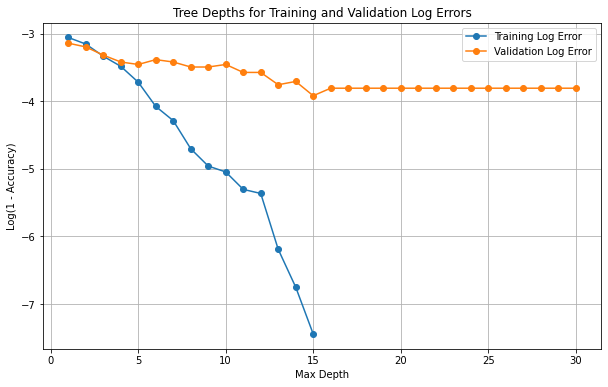

In [18]:
log_train_err = np.log(1 - np.array(train_accuracy_ls))
log_val_err = np.log(1 - np.array(val_accuracy_ls))

plt.figure(figsize=(10, 6))
plt.plot(depths, log_train_err, '-o', label='Training Log Error')
plt.plot(depths, log_val_err, '-o', label='Validation Log Error')
plt.title('Tree Depths for Training and Validation Log Errors')
plt.xlabel('Max Depth')
plt.ylabel('Log(1 - Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

The model starts overffiting from max depth equals to 16 and the training cccuracy is 1.0 and validation Accuracy is 0.977751756440281.

# ？？？对下答案 4. (0.5pt) What is the best validation accuracy that you get? What is the corresponding maximum depth?

In [19]:
best_va_acc = max(val_accuracy_ls)
best_depth = depths[val_accuracy_ls.index(best_va_acc)]
print("The best validation accuracy is:", best_va_acc, "at max depth of", best_depth)

The best validation accuracy is: 0.9800936768149883 at max depth of 15


The best validation accuracy that I get is 0.9800936768149883 at max depth of 15.

# ？？？回答的对吗 5. (0.5pt) Discuss your findings: where does the model start overfitting? What is the optimal depth?

The model begins to overfit at a maximum depth of 16, where the training accuracy reaches 100%, indicating that the model is fitting to the noise in the training data rather than the underlying pattern. Overfitting is further suggested as the validation accuracy does not improve with the increased training accuracy beyond this point. The optimal depth for the decision tree in this scenario is 15, as it provides the highest validation accuracy of approximately 0.9801, balancing the bias-variance tradeoff effectively.

## 2.2 Minimum sample size to split (3pt) 
## Next, let’s repeat 1.3 with “min_sample_split”:

# ??? 1. (0.5pt) Explain what the min_sample_split parameter does. Do large or small values lead to overfitting?

The min_samples_split parameter in decision tree models is a critical hyperparameter that influences the degree to which the model will learn the training data. It specifies the minimum number of samples required to split an internal node. In simpler terms, this parameter dictates the smallest number of data points that must be present in a node for a split to be considered at that node.

# ??? 如何看overfitting以及underfitting? underfitting 是从什么时候开始的图像是否需要log？2. (1pt) Run a series of decision tree models with different min_sample_split values in a loop. Try to cover both underfitting and overfitting. Each time store both validation and training accuracy. Make a plot where you show how both training and validation accuracy depend on the parameter.

In [20]:
min_samples_splits = range(2, 700, 10)
train_acc = []
val_acc = []

for min_samples_split in min_samples_splits:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    val_acc.append(accuracy_score(y_test, val_pred))
    
    print("Min Samples Split:", min_samples_split, "Training Accuracy:", train_acc[-1], "Validation Accuracy:", val_acc[-1])

Min Samples Split: 2 Training Accuracy: 1.0 Validation Accuracy: 0.977751756440281
Min Samples Split: 12 Training Accuracy: 0.9935578330893119 Validation Accuracy: 0.9742388758782201
Min Samples Split: 22 Training Accuracy: 0.9900439238653002 Validation Accuracy: 0.9754098360655737
Min Samples Split: 32 Training Accuracy: 0.9882869692532943 Validation Accuracy: 0.9707259953161592
Min Samples Split: 42 Training Accuracy: 0.987701317715959 Validation Accuracy: 0.9707259953161592
Min Samples Split: 52 Training Accuracy: 0.9865300146412884 Validation Accuracy: 0.9730679156908665
Min Samples Split: 62 Training Accuracy: 0.9850658857979502 Validation Accuracy: 0.9742388758782201
Min Samples Split: 72 Training Accuracy: 0.9838945827232797 Validation Accuracy: 0.9730679156908665
Min Samples Split: 82 Training Accuracy: 0.9838945827232797 Validation Accuracy: 0.9730679156908665
Min Samples Split: 92 Training Accuracy: 0.9803806734992679 Validation Accuracy: 0.968384074941452
Min Samples Split: 

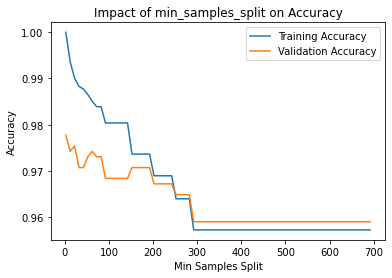

In [21]:
plt.plot(min_samples_splits, train_acc, label='Training Accuracy')
plt.plot(min_samples_splits, val_acc, label='Validation Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Impact of min_samples_split on Accuracy')
plt.show()

### 3. (0.5pt) What is the best validation accuracy you get? What is the corresponding min_sample_split?

In [22]:
best_val_acc = max(val_acc)
corres_split = min_samples_splits[val_acc.index(best_val_acc)]
print("The best validation accuracy is:", best_val_acc, "at max depth of",corres_split)

The best validation accuracy is: 0.977751756440281 at max depth of 2


### 4. (0.5pt) Discuss your findings: where does the model start overfitting?

Overfitting begins when the model becomes too complex, allowing for more detailed splits of the data points (i.e., smaller min_samples_split values). Specifically, we see overfitting signs when min_samples_split is 2, where the training accuracy hits 1.0, but validation accuracy is 0.9778. As the "Min Samples Split" increases, the gap between them widens, indicating overfitting.

# ？？？这个答案怎么回复 5. (0.5pt) Write a double loop over both parameters. Try to pick a number of values not too different from what you found above when analyzing those individually. Store the best result and the respective parameters.

In [23]:
max_depths = range(10, 21)  # Exploring around 15
min_samples_splits = range(10, 70, 10)  # Exploring around small to moderate values

best_val_acc = 0  
best_depth = None
best_min_samples_split = None


for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        val_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, train_pred)
        val_acc = accuracy_score(y_test, val_pred)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_depth = max_depth
            best_min_samples_split = min_samples_split
        print("Max Depth:", max_depth, "Min Samples Split:", min_samples_split, "Training Accuracy:", train_acc, "Validation Accuracy:", val_acc)
print("\nBest Validation Accuracy:", best_val_acc, "at Max Depth:", best_depth, "and Min Samples Split:", best_min_samples_split)

Max Depth: 10 Min Samples Split: 10 Training Accuracy: 0.9900439238653002 Validation Accuracy: 0.9707259953161592
Max Depth: 10 Min Samples Split: 20 Training Accuracy: 0.986822840409956 Validation Accuracy: 0.9718969555035128
Max Depth: 10 Min Samples Split: 30 Training Accuracy: 0.986822840409956 Validation Accuracy: 0.9718969555035128
Max Depth: 10 Min Samples Split: 40 Training Accuracy: 0.9865300146412884 Validation Accuracy: 0.9707259953161592
Max Depth: 10 Min Samples Split: 50 Training Accuracy: 0.9850658857979502 Validation Accuracy: 0.9742388758782201
Max Depth: 10 Min Samples Split: 60 Training Accuracy: 0.9850658857979502 Validation Accuracy: 0.9742388758782201
Max Depth: 11 Min Samples Split: 10 Training Accuracy: 0.9915080527086384 Validation Accuracy: 0.968384074941452
Max Depth: 11 Min Samples Split: 20 Training Accuracy: 0.9882869692532943 Validation Accuracy: 0.9718969555035128
Max Depth: 11 Min Samples Split: 30 Training Accuracy: 0.9882869692532943 Validation Accura

### 3 Random forests (4 pts)
### Now it is time to use random forests. Check out sklearn’s RandomForestClassifier.
# ？？ 1. (1pt) Explain what the n_estimators parameter does.

The n_estimators refers to the number of trees in the forest. Essentially, it determines how many individual decision trees will be built in the random forest model. Each tree is built on a bootstrap sample (a random sample taken with replacement) of the training data, and during prediction, each tree in the forest "votes" to determine the final class prediction. Increasing the number of trees can increase the robustness and accuracy of the model, but it also increases computational cost and may lead to diminishing returns after a certain point.

# ？？ 2. (1pt) Run a series of random forest classifiers testing what is the best number of estimators. This may be slow, so you may want to skip quite a few potential values.

In [24]:
n_estimators_values = range(10, 1000, 50)
train_acc = []
val_acc = []

best_val_acc = 0
best_n_estimators = None

for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_test, val_pred)
    
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)
    
    print("n_estimators:", n_estimators, "Training Accuracy:", train_accuracy, "Validation Accuracy:", val_accuracy)
    
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        best_n_estimators = n_estimators
    
print("\nBest Validation Accuracy:", best_val_acc, "with n_estimators:", best_n_estimators)

n_estimators: 10 Training Accuracy: 0.9982430453879941 Validation Accuracy: 0.9812646370023419
n_estimators: 60 Training Accuracy: 1.0 Validation Accuracy: 0.9742388758782201
n_estimators: 110 Training Accuracy: 1.0 Validation Accuracy: 0.9800936768149883
n_estimators: 160 Training Accuracy: 1.0 Validation Accuracy: 0.9800936768149883
n_estimators: 210 Training Accuracy: 1.0 Validation Accuracy: 0.9824355971896955
n_estimators: 260 Training Accuracy: 1.0 Validation Accuracy: 0.9789227166276346
n_estimators: 310 Training Accuracy: 1.0 Validation Accuracy: 0.9789227166276346
n_estimators: 360 Training Accuracy: 1.0 Validation Accuracy: 0.9789227166276346
n_estimators: 410 Training Accuracy: 1.0 Validation Accuracy: 0.9812646370023419
n_estimators: 460 Training Accuracy: 1.0 Validation Accuracy: 0.9800936768149883
n_estimators: 510 Training Accuracy: 1.0 Validation Accuracy: 0.9800936768149883
n_estimators: 560 Training Accuracy: 1.0 Validation Accuracy: 0.977751756440281
n_estimators: 61

### 3. (1pt) Make a plot where you show how both training and validation accuracy depend on the parameter. What is the best validation accuracy you get? 

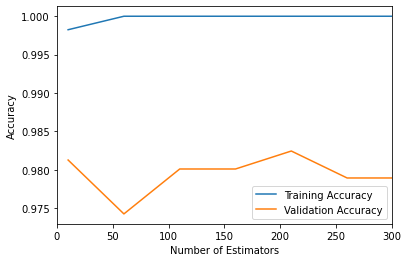

Best Validation Accuracy:  0.9824355971896955  with  210  estimators


In [28]:
plt.plot(n_estimators_values, train_acc, label='Training Accuracy')
plt.plot(n_estimators_values, val_acc, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xlim(0, 300)
plt.legend()
plt.show()

print("Best Validation Accuracy: ", best_val_acc, " with ", best_n_estimators, " estimators")

The best validation accuracy I get is 0.9824355971896955  with  210  estimators.

# ？？ 4. (1pt) Where does the model start overfitting, please explain?

At n_estimators = 60, the model becomes overfit. From this point forward, the Training Accuracy attains a score of 1.0, whereas the Validation Accuracy remains lesser and fluctuates. When there is such a large disparity between training and validation scores, the model may not generalize well to unseen data because it fits the training data too closely.